### WeRateDogs Twitter Analysis



### Introduction

The purpose of this study is to ingest Twitter data from a variety of sources and formats, assess it for quality and tidyness, clean and analyze the data.  Since the collection of this data was not through a random experiment,  findings are NOT assumed to have causality.

"Data for this project came from the archive of  twitter user @dog_rates archive known as WeRateDogs."  Users send the account pictures of their dogs and they receive a witty response and a rating of the dog.  The rating ranges from 0 to 13 (denominator) and is compared to 10 as the numerator.  WeRateDogs does not follow rigid rating.  They have values above 13.

Twitter provided Udacity permission to use the archive and Twitter also granted this author "Student" access to Tweety (their API) to download the tweet data associated with this project.

Project data for this study was supplied by Udacity at the following url:

https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/5e3db54a-1a5f-41a6-8e20-fd99f201861d

Training for techiques used in this analysis came from Udacity Data Analysis class and from pandas and matplotlib documentation at the following URLs:

https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html?highlight=str%20extract#pandas.Series.str.extract

https://matplotlib.org/3.1.0/gallery/index.html

https://stackoverflow.com/search?q=save+output+as+.png+matplotlib

In [2]:
# import modules needed to work with this dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
from IPython.display import Image

## Analysis

In this analysis, we ask the following questions:

1) What is the most popular dog name?

2) Which stage has the largest number of dogs?

3) What was the distribution of dog ratings by development stage?

4) What were the highest and lowest ratings by development stage?

5) What is the distribution of retweets by development stage?

6) What was the name of the dog receiving the highest retweet?  How many times was it retweeted?

7) What was the name of the dog receiving the highest number of favorites?  How many times was it favorited?

8) What is the total retweet performance of WeRateDogs over time?

9) Which dogs were identified most by the predictive image tool (using prediction_1 column only)?

10) Is there a correlation between the rating and the count of retweets?


In [3]:
# read the twitter_archive_master.csv file
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
# view the contents of the file
twitter_archive_master.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,rating,development_stage,text,...,prediction3_conf,prediction3_dog,created_at,id_str,full_text,user,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,None,This is Phineas. He's a mystical boy. Only eve...,...,NaN,NaN,2017-08-01 16:23:56+00:00,8.924206e+17,This is Phineas. He's a mystical boy. Only eve...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7595,35860,False,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,None,This is Tilly. She's just checking pup on you....,...,0.068957,True,2017-08-01 00:17:27+00:00,8.921774e+17,This is Tilly. She's just checking pup on you....,"{'id': 4196983835, 'id_str': '4196983835', 'na...",5626,30938,False,False
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,None,This is Archie. He is a rare Norwegian Pouncin...,...,0.031379,True,2017-07-31 00:18:03+00:00,8.918152e+17,This is Archie. He is a rare Norwegian Pouncin...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",3721,23283,False,False
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,None,This is Darla. She commenced a snooze mid meal...,...,NaN,NaN,2017-07-30 15:58:51+00:00,8.916896e+17,This is Darla. She commenced a snooze mid meal...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7772,39129,False,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,None,This is Franklin. He would like you to stop ca...,...,0.175219,True,2017-07-29 16:00:24+00:00,8.913276e+17,This is Franklin. He would like you to stop ca...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",8370,37382,False,False


In [4]:
# look at the maximum and minimum dates for the data.
twitter_archive_master['timestamp'].max(), twitter_archive_master['timestamp'].min()

('2017-08-01 16:23:56+00:00', '2015-11-15 22:32:08+00:00')

In [5]:
# changes the timestamp column to datetime
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp']) 

In [6]:
# look at the dataset structure
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   rating              2175 non-null   float64            
 8   development_stage   2175 non-null   object             
 9   text                2175 non-null   object             
 10  twitter_URLs        2175 non-null   object             
 11  jpg_url             1477 non-null   object             
 12  img_num             1477 non-null 



1) What is the most popular dog name?

In [7]:
# utilize value_counts to identify the most popular name
twitter_archive_master['name'].value_counts()[1:11]

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Penny       9
Tucker      9
Toby        8
Lola        8
Sadie       8
Winston     8
Name: name, dtype: int64

"Charlie was the most popular dog, with Lucy, Oliver, and Cooper tied for 2nd most popular dog name.

2) Which stage has the largest number of dogs?

In [8]:
# utilize value_counts to identify the largest dog stage
twitter_archive_master['development_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: development_stage, dtype: int64

Text(17.625, 0.5, 'Number of dogs')

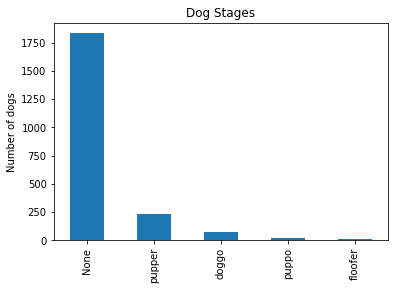

In [9]:
#plots the dog stages
ax = twitter_archive_master['development_stage'].value_counts().sort_values(ascending=False).plot(kind='bar', title = 'Dog Stages')
plt.savefig('dog_stages.png')
plt.ylabel('Number of dogs')

As we can see in the graph, and in the table, None had the largest count, followed by pupper.  While looking at the text field during data wrangling, we were able to see WeRateDogs did not stick to using these 4 dog stages.  A future could look at expanding to identify all of the stage names used by WeRateDogs.

3) What was the distribution of retweet_counts by development stage?

In [10]:
# creates separate datasets by development stage
doggo = twitter_archive_master[twitter_archive_master['development_stage']== "doggo"]
floofer = twitter_archive_master[twitter_archive_master['development_stage']== "floofer"]
pupper = twitter_archive_master[twitter_archive_master['development_stage']== "pupper"]
puppo = twitter_archive_master[twitter_archive_master['development_stage']== "puppo"]


''

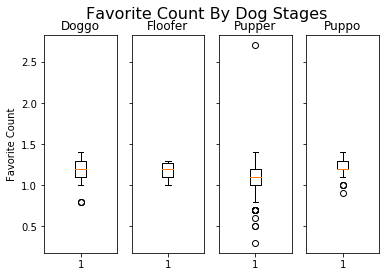

In [11]:
# creates boxplots of each development stage
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey='row', sharex='col')
fig.suptitle ('Favorite Count By Dog Stages', fontsize = 16)
ax1.boxplot(doggo['rating']);
ax1.set_title('Doggo')
ax1.set_ylabel('Favorite Count')
ax2.boxplot(floofer['rating'])
ax2.set_title('Floofer')
ax3.boxplot(pupper['rating'])
ax3.set_title('Pupper')
ax4.boxplot(puppo['rating'])
ax4.set_title('Puppo')
;

In [12]:
# prints the descriptive statistics for the dog ratings by stage to supplement the boxplots
d1 = doggo['rating'].describe(), 
d2 = floofer['rating'].describe(), 
d3=  pupper['rating'].describe(),
d4 = puppo['rating'].describe()
print('doggo')
print(d1)
print('floofer')
print(d2)
print('pupper')
print(d3)
print('puppo')
print(d4)


doggo
(count    75.000000
mean      1.185333
std       0.143030
min       0.800000
25%       1.100000
50%       1.200000
75%       1.300000
max       1.400000
Name: rating, dtype: float64,)
floofer
(count    10.00000
mean      1.18000
std       0.10328
min       1.00000
25%       1.10000
50%       1.20000
75%       1.27500
max       1.30000
Name: rating, dtype: float64,)
pupper
(count    234.000000
mean       1.082051
std        0.203242
min        0.300000
25%        1.000000
50%        1.100000
75%        1.200000
max        2.700000
Name: rating, dtype: float64,)
puppo
count    25.000000
mean      1.208000
std       0.125565
min       0.900000
25%       1.200000
50%       1.200000
75%       1.300000
max       1.400000
Name: rating, dtype: float64


Looking at the boxplots above, we see pupper has an outlier.  Using .describe(), we see that pupper has a rating higher than any other at 2.7.  

Doggo and pupper appear to be symmetric, although doggo appears to have outliers in excess of 1.5 time the lower interquartile range.  Floofer appears to be right skewed.

Pupper has outliers greater than 1.5 times above and below the interquartile ranges. 

Puppo appears to have a multimodal distribution.  Pupper and floofer have small sample sizes, which may have some effect on the shape of puppo's distribution.

4) What were the highest and lowest ratings by development stage?

In [13]:
# prints the minimum and maximum ratings by dog stage
r1 = doggo['rating'].max()
r2 = floofer['rating'].max()
r3 = pupper['rating'].max()
r4 = puppo['rating'].max()
r5 = doggo['rating'].max()
r6 = floofer['rating'].max()
r7 = pupper['rating'].max()
r8 = puppo['rating'].max()
m1 = doggo['rating'].min()
m2 = floofer['rating'].min()
m3 = pupper['rating'].min()
m4 = puppo['rating'].min()
m5 = doggo['rating'].min()
m6 = floofer['rating'].min()
m7 = pupper['rating'].min()
m8 = puppo['rating'].min()   

print('Doggo maximum rating is ', r1), print('and minimum rating is ', m1)
print()
print('Floofer maximum rating is ', r2), print('and minimum rating is ', m2)
print()
print('Pupper maximum rating is ', r3), print('and minimum rating is ', m3)
print()
print('Puppo maximum rating is ', r4), print('and minimum rating is ', m4)


Doggo maximum rating is  1.4
and minimum rating is  0.8

Floofer maximum rating is  1.3
and minimum rating is  1.0

Pupper maximum rating is  2.7
and minimum rating is  0.3

Puppo maximum rating is  1.4
and minimum rating is  0.9


(None, None)

Puppers received the highest rating and lowest rating of all of the stages.

5) What is the distribution of retweets by development stage?

In [14]:
# creates separate datasets by dog stage and retweet count
retweet_doggo = doggo[doggo.retweet_count >0]
retweet_floofer = floofer[floofer.retweet_count >0]
retweet_pupper = pupper[pupper.retweet_count >0]
retweet_puppo = puppo[puppo.retweet_count >0]

Text(0.5, 1.0, 'Floofer')

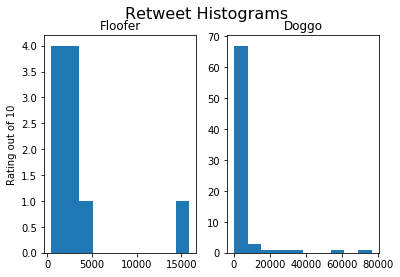

In [15]:
# prints the histograms for each dog stage (first 2 charts)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle ('Retweet Histograms', fontsize = 16)
ax2.hist(doggo['retweet_count']);
ax2.set_title('Doggo')
ax1.set_ylabel('Rating out of 10')
ax1.hist(floofer['retweet_count'])
ax1.set_title('Floofer')

''

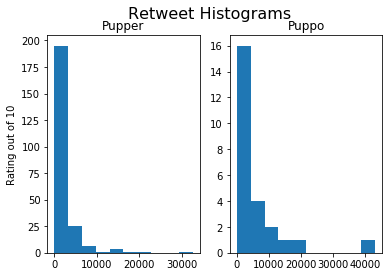

In [16]:
# prints the histograms for each dog stage (second 2 charts)
fig, (ax3, ax4) = plt.subplots(1,2)
fig.suptitle ('Retweet Histograms', fontsize = 16)
ax3.set_ylabel('Rating out of 10')
ax3.hist(pupper['retweet_count'])
ax3.set_title('Pupper')
ax4.hist(puppo['retweet_count'])
ax4.set_title('Puppo')
;

All of the histograms above appear to be left skewed, with outliers at the higher end.  Pupper has the highest count of retweets at the lower end with almost 200.

6) What was the name of the dog receiving the highest retweet?  How many times was it retweeted?

In [17]:
#prints the maximum number of retweets
retw_max = twitter_archive_master['retweet_count'].max()
print('The maximum retweet_count value is: ', retw_max)

The maximum retweet_count value is:  76724


In [18]:
# creates variables to store the max values used in printing below
maxdog = twitter_archive_master.query('retweet_count == 76724')
retweet_max_name = maxdog['name'].iloc[0]
retweet_max_count = maxdog['retweet_count'].iloc[0]
dog_stage = maxdog['development_stage'].iloc[0]
retweet_max_url = maxdog['expanded_urls'].iloc[0]

In [19]:
# prints the max values
print('The name of the dog with maximum retweets is:  ', retweet_max_name)
print('Total number of of retweets(maximum) is" ', retweet_max_count)
print('Dog Development Stage:', dog_stage)
print('URL for the image of the dog with maximum retweets is: ', retweet_max_url);

The name of the dog with maximum retweets is:   None
Total number of of retweets(maximum) is"  76724
Dog Development Stage: doggo
URL for the image of the dog with maximum retweets is:  https://twitter.com/dog_rates/status/744234799360020481/video/1


Looking at URL of the max retweet and clicking on the HTML link, I observed a dog (no name was provided) in a video discovering it couult finally standing up in swimming pool.   The dog was retweeted 76,724 times.

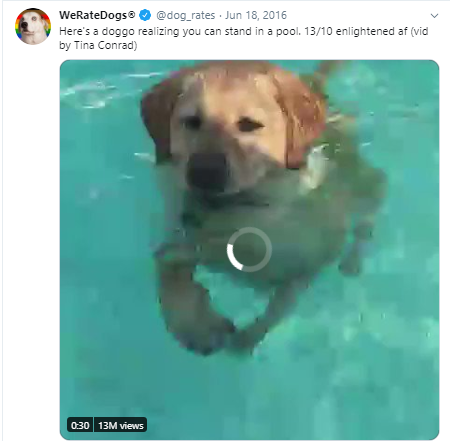

In [20]:
# prints the image from a jpg file
Image(filename='swimmingdog.jpg') 

Source for this image: WeRateDogs  https://twitter.com/dog_rates/status/744234799360020481/video/1

7) What was the name of the dog receiving the highest number of favorites?  How many times was it favorited?

In [21]:
# identifies the maximum favorite count, stores in a variable and prints it
fav_max = twitter_archive_master['favorite_count'].max()
print('The maximum favorite_count value is: ', fav_max)

The maximum favorite_count value is:  154502


In [22]:
# stores max values in variables for printing
maxdog = twitter_archive_master.query('favorite_count == 154502')
fav_max_name = maxdog['name'].iloc[0]
fav_max_count = maxdog['favorite_count'].iloc[0]
fav_max_url = maxdog['expanded_urls'].iloc[0]

In [23]:
# prints the maximum values
print('The name of the dog with maximum favorite count is: ',fav_max_name)
print('Total number of of favorites (maximum) is: ',fav_max_count)
print('URL for the image of the dog with maximum favorite_count is: ',fav_max_url)

The name of the dog with maximum favorite count is:  None
Total number of of favorites (maximum) is:  154502
URL for the image of the dog with maximum favorite_count is:  https://twitter.com/dog_rates/status/744234799360020481/video/1


Looking at the URL for the max favorite count, I observed the same dog that was mentioned in the question above.

7) Retweets are a measure of success.  Using this dataset, What is the total retweet performance of WeRateDogs over time?

In [24]:
twitter_archive_master['timestamp'].max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

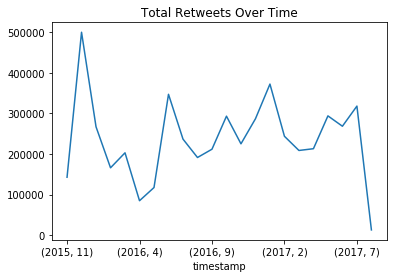

In [25]:
# creates line chart of retweets over time
line_values = twitter_archive_master.retweet_count.groupby([twitter_archive_master['timestamp'].dt.year, 
                                                              twitter_archive_master['timestamp'].dt.month]).sum()
ax = line_values.plot(kind = 'line', title = 'Total Retweets Over Time')
ax.set_xlabel('timestamp');

Retweets appeared to be trending up.  The drop-off is due to the last date not having a data point.

8) Which dog breeds were identified most by the predictive image tool (using prediction1 column only)?

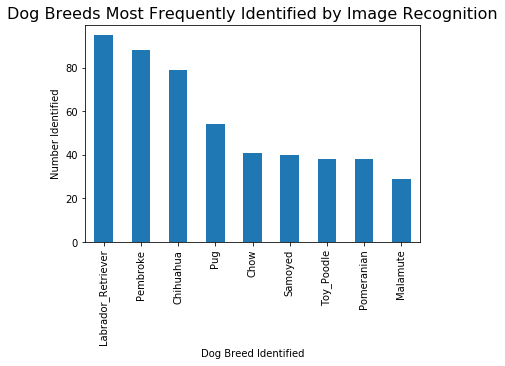

In [26]:
# creates bar chart with most popular dog breeds
ax = twitter_archive_master['prediction1'].value_counts()[1:10].sort_values(ascending=False).plot(kind='bar')
plt.title('Dog Breeds Most Frequently Identified by Image Recognition', fontsize = 16)
plt.xlabel('Dog Breed Identified')
plt.ylabel('Number Identified');

According to the graph, Labrador retriever was the most-identified dog type using the image recognition tool and focusing on Prediction 1 only.

10) Is there a correlation between favorite count and the count of retweets?

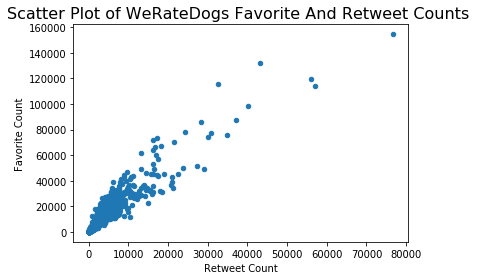

In [27]:
# creates scatter plot of retweet count and favorite count
twitter_archive_master.plot(kind='scatter', x = 'retweet_count', y = 'favorite_count')
plt.title('Scatter Plot of WeRateDogs Favorite And Retweet Counts ', Fontsize = 16)
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

We can see there is a positive correlation between Favorite and Retweet counts, indicating that people are more likely to favorite something if if they retweet it.

### Conclusion

In conclusion, we ingested data from three different sources:  1) twitter-archive-enhanced.csv (imported as a .csv, tweet_json.txt programatically obtained via the Tweepy API, and image_predictions.txv (read programatically from the internet.

Using a variety of data wrangling techniques, we evaluated the files, discovering a number of opportunities to improve the quality and tidyness of the data.  Using a combination of programmatic and manual techniques, the data was cleaned and saved as twitter_archive_master.csv.  Data used in this study was from 11/15/2015 through 8/1/2017.

The analysis was based on the data resulting from the data wrangling steps identified above.  Here is a summary of significant findings:

As stated earlier, this was not a random experiment, therefore, we are unable to assume causality for any findings.

* Charlie was the most popular dog name
* Of the dog stages, "None" was the largest category, followed by pupper.  This was likely due to WeRateDogs not following a strict stage naming protocol (example: using pupperdoodle rather than pupper).  Further analysis may seek to identify all of these names and either add to the development stages or recategorize them in the four development stages).
* Looking at the distribution data for dog stages by development stage,  doggo and pupper appear to be symmetric, although doggo appears to have outliers in excess of 1.5 time the lower interquartile range. Floofer appears to be right skewed.  Pupper has outliers greater than 1.5 times above and below the interquartile ranges.  Puppo appears to have a multimodal distribution. Pupper and floofer have small sample sizes, which may have some effect on the shape of puppo's distribution.
* Looking at the distribution data for dog stages by development stage, all of the retweet count histograms above appear to be left skewed, with outliers at the higher end. Pupper has the highest count of retweets at the lower end with almost 200.
* The dog having the highest number of retweets (76,724) did not have a name.  It was a video of a dog in a dog-paddling in a swimming pool and finally realizing it could stand up on its hind legs. 
* The same dog had the maximum number of favorites (154,502).
* Using the image recognition/prediction data (first image column), we saw that the most recognized dog was a labrador retriever.
* Finally, we saw a positive strong correlation between the count of retweets and the count of favorites.

While not provided in this analysis, future studies may look at the the predictability of different dog breeds on the count of favorites and retweets. 